In [10]:
import numpy as np
from scipy import *
import os
import h5py
import keras as k
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from sklearn.utils import shuffle
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pickle

In [11]:
file = open(r"C:\Users\fires\Desktop\CSIRO\thursday\HOG\images.dat",'rb')
images = pickle.load(file)
file.close()

file = open(r"C:\Users\fires\Desktop\CSIRO\thursday\HOG\labels.dat",'rb')
labels = pickle.load(file)
file.close()

In [12]:
images = images.reshape(-1, 89*89)

In [13]:
# balance classes
def bal_classes(images, labels):
    class1 = []
    class2 = []
    
    for i in range(labels.shape[0]):
        if labels[i] == False:
            class1.append(i)
    
    for i in range(labels.shape[0]):
        if labels[i] == True:
            class2.append(i)
    
    if len(class2) > len(class1):
        class2 = np.asarray(class2[:len(class1)])
    
    elif len(class2) < len(class1):
        class1 = np.asarray(class1[:len(class2)])
        
    images1 = images[class1, :] 
    images2 = images[class2, :]
    labels1 = labels[class1,]
    labels2 = labels[class2,]
    
    print (labels2.shape)
    
    images_st = np.vstack((images1, images2))
    labels_st =  np.concatenate((labels1, labels2), axis=0)              
        
    images_s, labels_s = shuffle(np.asarray(images_st), np.asarray(labels_st), random_state = 0)    
        
    return images_s, labels_s

In [37]:
images_p, labels_p = bal_classes(np.asarray(images), np.asarray(labels))

(1216,)


In [38]:
def format_data(images, labels, ratio = 0.5):
    split = round(ratio*images.shape[0])
    
    train_x = images[ :split, :]
    test_x = images[split:, :]
    train_y = labels[ :split]
    test_y = labels[split:]
    
    return train_x, test_x, train_y, test_y


train_x, test_x, train_y, test_y = format_data(images_p, labels_p)

In [39]:
# Convert class vectors to binary class matrices
train_y = np_utils.to_categorical(train_y, 2)
test_y = np_utils.to_categorical(test_y, 2)

In [40]:
# Define model attributes

batch_size = 20
nb_classes = output_dims = 2
nb_epoch = 400
input_dim = 7921

model = Sequential()
model.add(Dense(100, input_dim = input_dim, activation = 'softmax'))
model.add(Dropout(0.2))
model.add(Dense(units=output_dims, activation = "sigmoid"))

In [41]:
model.compile(optimizer="adam", loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=nb_epoch, batch_size=batch_size, 
          validation_data=(test_x, test_y))

Train on 1216 samples, validate on 1216 samples
Epoch 1/400
1216/1216 [==============================] - 3s 2ms/step - loss: 0.6934 - acc: 0.4803 - val_loss: 0.6932 - val_acc: 0.4885
Epoch 2/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.6931 - acc: 0.5058 - val_loss: 0.6933 - val_acc: 0.4885
Epoch 3/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.6931 - acc: 0.5090 - val_loss: 0.6934 - val_acc: 0.4885
Epoch 4/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.6930 - acc: 0.5107 - val_loss: 0.6934 - val_acc: 0.4885
Epoch 5/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.6928 - acc: 0.5115 - val_loss: 0.6934 - val_acc: 0.4885
Epoch 6/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.6927 - acc: 0.5115 - val_loss: 0.6936 - val_acc: 0.4885
Epoch 7/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.6928 - acc: 0.5115 - val_loss: 0.6936 - val_acc: 0.4885
Epoch 8

Epoch 61/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.6775 - acc: 0.6135 - val_loss: 0.6820 - val_acc: 0.5650
Epoch 62/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.6766 - acc: 0.6151 - val_loss: 0.6814 - val_acc: 0.5691
Epoch 63/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.6763 - acc: 0.6283 - val_loss: 0.6809 - val_acc: 0.5674
Epoch 64/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.6758 - acc: 0.6176 - val_loss: 0.6802 - val_acc: 0.5748
Epoch 65/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.6752 - acc: 0.6324 - val_loss: 0.6796 - val_acc: 0.5789
Epoch 66/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.6745 - acc: 0.6176 - val_loss: 0.6792 - val_acc: 0.5666
Epoch 67/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.6737 - acc: 0.6382 - val_loss: 0.6783 - val_acc: 0.5880
Epoch 68/400
1216/1216 [========================

1216/1216 [==============================] - 2s 1ms/step - loss: 0.5973 - acc: 0.7459 - val_loss: 0.6259 - val_acc: 0.6661
Epoch 122/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.5952 - acc: 0.7566 - val_loss: 0.6249 - val_acc: 0.6678
Epoch 123/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.5987 - acc: 0.7204 - val_loss: 0.6240 - val_acc: 0.6653
Epoch 124/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.5931 - acc: 0.7533 - val_loss: 0.6227 - val_acc: 0.6727
Epoch 125/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.5945 - acc: 0.7615 - val_loss: 0.6219 - val_acc: 0.6686
Epoch 126/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.5927 - acc: 0.7360 - val_loss: 0.6213 - val_acc: 0.6637
Epoch 127/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.5906 - acc: 0.7377 - val_loss: 0.6197 - val_acc: 0.6743
Epoch 128/400
1216/1216 [==============================

Epoch 181/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.5048 - acc: 0.8166 - val_loss: 0.5716 - val_acc: 0.7294
Epoch 182/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.5041 - acc: 0.8109 - val_loss: 0.5718 - val_acc: 0.7179
Epoch 183/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.5076 - acc: 0.8133 - val_loss: 0.5705 - val_acc: 0.7270
Epoch 184/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.5043 - acc: 0.7977 - val_loss: 0.5697 - val_acc: 0.7311
Epoch 185/400
1216/1216 [==============================] - 1s 1ms/step - loss: 0.4980 - acc: 0.8339 - val_loss: 0.5689 - val_acc: 0.7336
Epoch 186/400
1216/1216 [==============================] - 1s 1ms/step - loss: 0.4993 - acc: 0.8281 - val_loss: 0.5681 - val_acc: 0.7377
Epoch 187/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.4911 - acc: 0.8372 - val_loss: 0.5673 - val_acc: 0.7385
Epoch 188/400
1216/1216 [================

Epoch 241/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.4224 - acc: 0.8569 - val_loss: 0.5397 - val_acc: 0.7656
Epoch 242/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.4315 - acc: 0.8503 - val_loss: 0.5400 - val_acc: 0.7590
Epoch 243/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.4298 - acc: 0.8437 - val_loss: 0.5393 - val_acc: 0.7632
Epoch 244/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.4192 - acc: 0.8643 - val_loss: 0.5383 - val_acc: 0.7681
Epoch 245/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.4210 - acc: 0.8676 - val_loss: 0.5386 - val_acc: 0.7640
Epoch 246/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.4188 - acc: 0.8651 - val_loss: 0.5377 - val_acc: 0.7673
Epoch 247/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.4179 - acc: 0.8594 - val_loss: 0.5380 - val_acc: 0.7640
Epoch 248/400
1216/1216 [================

Epoch 301/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.3486 - acc: 0.8890 - val_loss: 0.5240 - val_acc: 0.7714
Epoch 302/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.3441 - acc: 0.8849 - val_loss: 0.5249 - val_acc: 0.7689
Epoch 303/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.3439 - acc: 0.8931 - val_loss: 0.5238 - val_acc: 0.7714
Epoch 304/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.3397 - acc: 0.8972 - val_loss: 0.5232 - val_acc: 0.7730
Epoch 305/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.3449 - acc: 0.8914 - val_loss: 0.5235 - val_acc: 0.7730
Epoch 306/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.3416 - acc: 0.8898 - val_loss: 0.5231 - val_acc: 0.7730
Epoch 307/400
1216/1216 [==============================] - 2s 2ms/step - loss: 0.3331 - acc: 0.8931 - val_loss: 0.5252 - val_acc: 0.7664
Epoch 308/400
1216/1216 [================

Epoch 361/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.2846 - acc: 0.9120 - val_loss: 0.5214 - val_acc: 0.7796
Epoch 362/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.2987 - acc: 0.9046 - val_loss: 0.5205 - val_acc: 0.7812
Epoch 363/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.2864 - acc: 0.9046 - val_loss: 0.5232 - val_acc: 0.7714
Epoch 364/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.2779 - acc: 0.9219 - val_loss: 0.5232 - val_acc: 0.7714
Epoch 365/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.2752 - acc: 0.9309 - val_loss: 0.5232 - val_acc: 0.7714
Epoch 366/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.2909 - acc: 0.9021 - val_loss: 0.5217 - val_acc: 0.7804
Epoch 367/400
1216/1216 [==============================] - 2s 1ms/step - loss: 0.2905 - acc: 0.9153 - val_loss: 0.5233 - val_acc: 0.7714
Epoch 368/400
1216/1216 [================

In [42]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


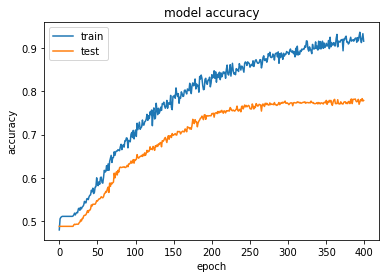

In [43]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
for layer in model.layers:
    weights = layer.get_weights()

wt = np.reshape(weights[0], (135, 135, 2))
    
for n in range(0, wt.shape[2]):
   plt.imshow(wt[:,:,n], cmap='gray', shape=(135, 135))
   print (n)
   plt.show()

print ("Dense to output layer weights " + str(weights[1]))

ValueError: cannot reshape array of size 200 into shape (135,135,2)